In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft
from scipy.io import loadmat

In [3]:
file = loadmat('/Volumes/Bharadwaj/PhysioNet/i-care-international-cardiac-arrest-research-consortium-database-1.0/training/ICARE_0284/ICARE_0284_05.mat')
arr = file['val']

In [20]:
print(len(arr))
print(len(arr[0]))

18
30000


In [24]:
average_data = np.mean(arr, axis=0)
print(len(average_data))

30000


In [4]:
eeg_single_channel = arr[0]
signal = eeg_single_channel

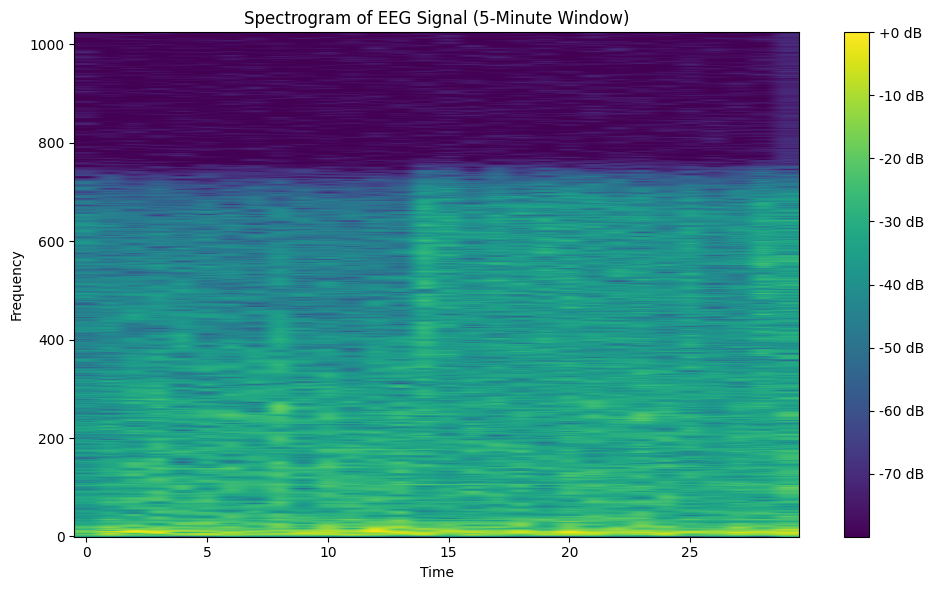

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Assuming you have the EEG signal loaded in the 'signal' variable and a known sampling rate of 100 Hz
eeg_signal = signal.astype(np.float32)  # Convert to floating-point
sampling_rate = 100

# Calculate the length of the signal in seconds and frames
signal_duration = len(eeg_signal) / sampling_rate
n_frames = int(signal_duration * sampling_rate)

n_fft = 2048
hop_length = n_fft // 2  # You can adjust this value for overlap

# Initialize an array to store spectrogram data
spectrogram_data = []

# Process the signal in chunks
for i in range(0, len(eeg_signal) - n_frames + 1, n_frames):
    chunk = eeg_signal[i:i+n_frames]
    D = np.abs(librosa.stft(chunk, n_fft=n_fft, hop_length=hop_length))
    spectrogram_data.append(D)

# Combine the spectrogram chunks into a single array
spectrogram = np.concatenate(spectrogram_data, axis=1)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(librosa.amplitude_to_db(spectrogram, ref=np.max), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram of EEG Signal (5-Minute Window)')
plt.tight_layout()
plt.show()


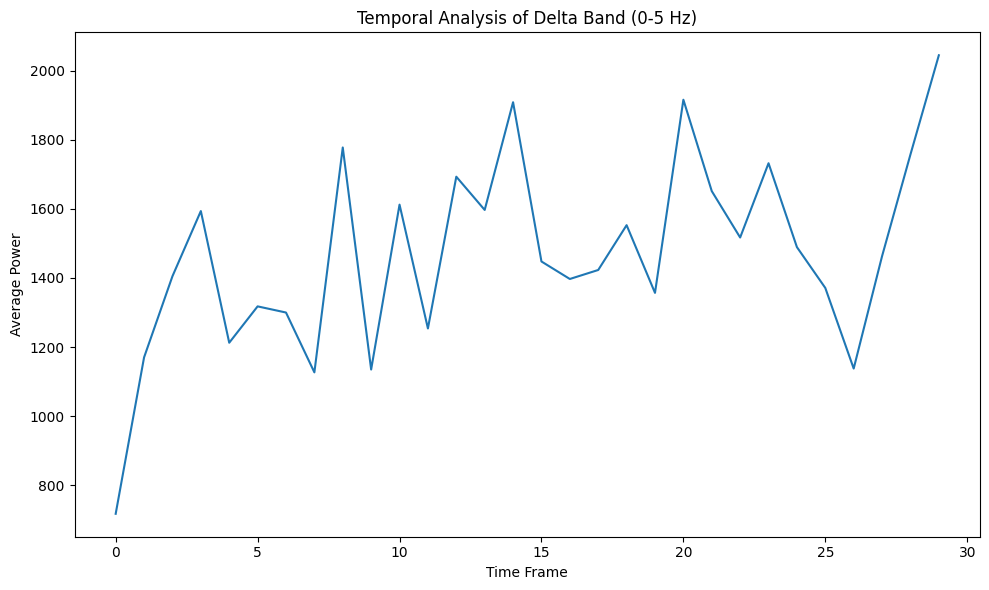

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load your mel-spectrogram data
# Replace 'mel_spectrogram' with your actual mel-spectrogram data
mel_spectrogram = spectrogram

# Calculate the Mel filterbank frequencies
mel_frequencies = librosa.mel_frequencies(n_mels=mel_spectrogram.shape[0], fmin=0, fmax=5)

# Find the indices corresponding to the delta band (0-5 Hz)
delta_indices = np.where((mel_frequencies >= 0) & (mel_frequencies <= 5))[0]

# Extract delta band data from the mel-spectrogram
delta_band_data = mel_spectrogram[delta_indices, :]

# Perform temporal analysis (e.g., calculate average power)
average_power = np.mean(delta_band_data, axis=0)

# Plot the temporal analysis result
plt.figure(figsize=(10, 6))
plt.plot(average_power)
plt.xlabel('Time Frame')
plt.ylabel('Average Power')
plt.title('Temporal Analysis of Delta Band (0-5 Hz)')
plt.tight_layout()
plt.show()


In [14]:
len(average_power)

30

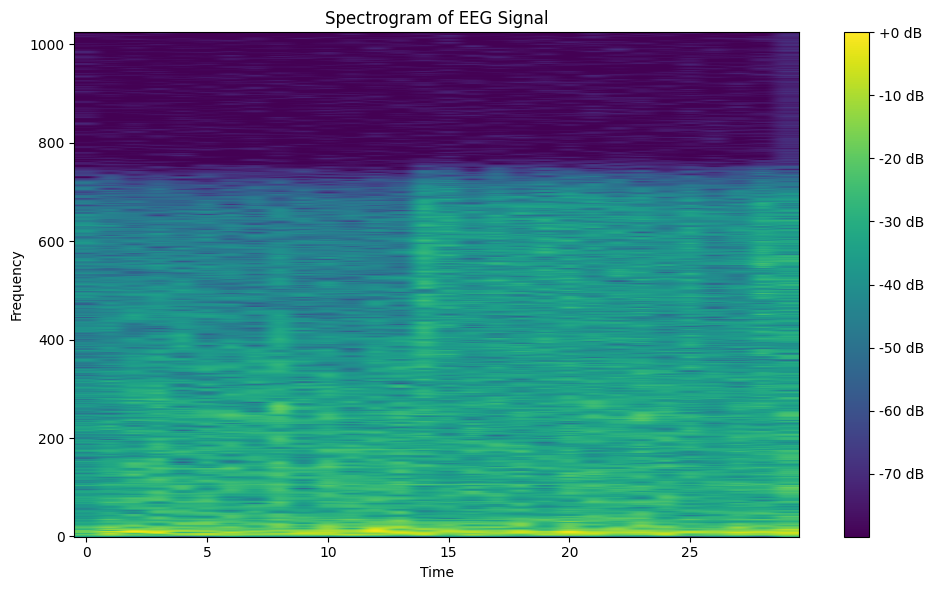

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Assuming you have the EEG signal loaded in the 'signal' variable and a known sampling rate of 100 Hz
eeg_signal = signal.astype(np.float32)  # Convert to floating-point
sampling_rate = 100

n_fft = 2048
hop_length = n_fft // 2  # You can adjust this value for overlap

# Compute the Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(eeg_signal, n_fft=n_fft, hop_length=hop_length))

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(librosa.amplitude_to_db(D, ref=np.max), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram of EEG Signal')
plt.tight_layout()
plt.show()
